In [49]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats as stats
from feature_engine.selection import DropCorrelatedFeatures
from feature_engine.selection import DropDuplicateFeatures
from feature_engine.selection import RecursiveFeatureAddition
from feature_engine.selection import RecursiveFeatureElimination
from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor, SGDClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectFromModel, SelectKBest
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler,  OneHotEncoder, OrdinalEncoder,PolynomialFeatures,PowerTransformer, FunctionTransformer
from sklearn.svm import SVC, SVR 
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, roc_auc_score, mean_squared_error, accuracy_score,confusion_matrix, f1_score

In [50]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [51]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/mlbvn/handson-ml2-vn/main/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [52]:
fetch_housing_data()

In [53]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [54]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [55]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [56]:
num = [x for x in housing.columns if housing[x].dtypes != "O" and x != "median_house_value"]
cat = [x for x in housing.columns if housing[x].dtypes == "O"]

In [57]:
def draw(df, var):
    plt.figure(figsize=(18,10))
    
    plt.subplot(1,3, 1)
    sns.histplot(df[var], kde=True)
    
    plt.subplot(1,3,2)
    stats.probplot(df[var].dropna(), dist="norm", plot=plt)
    
    plt.subplot(1,3,3)
    sns.boxplot(df[var])

/home/md/anaconda3/envs/myproject/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


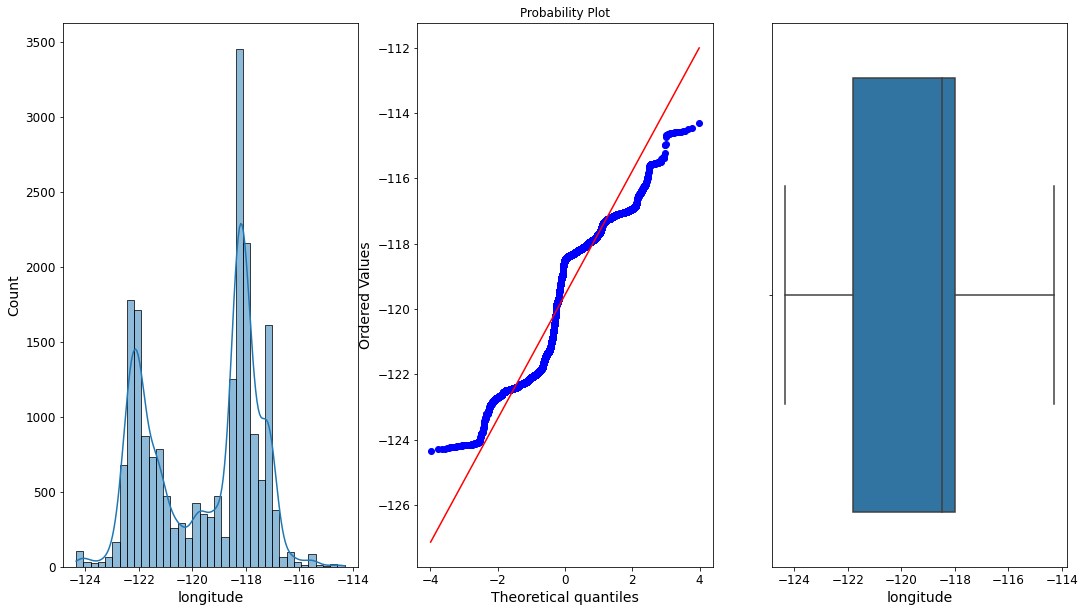

In [58]:
draw(housing, "longitude")

/home/md/anaconda3/envs/myproject/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


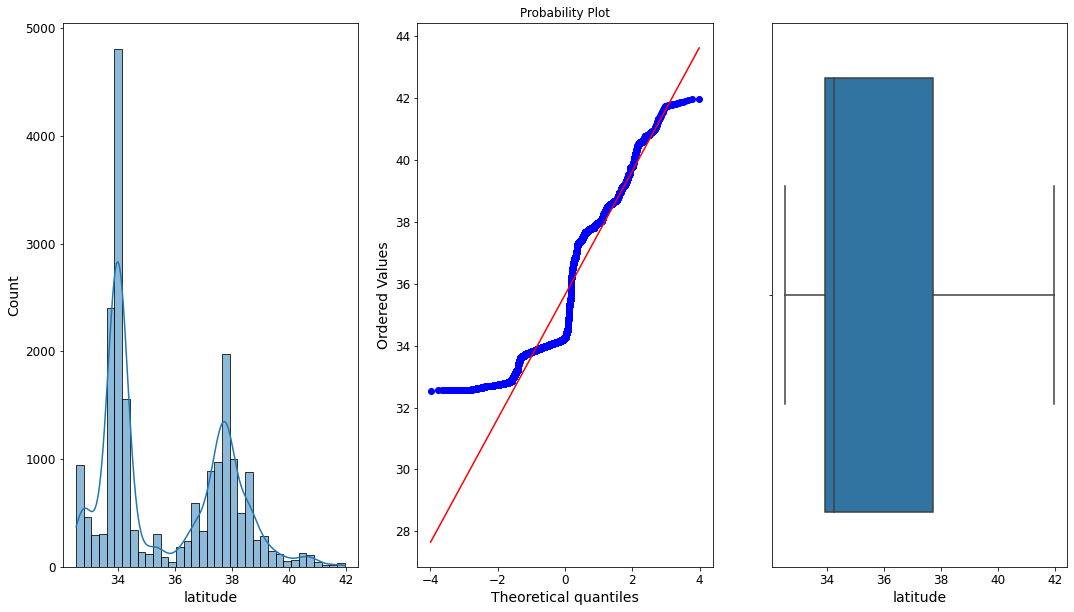

In [59]:
draw(housing, "latitude")

/home/md/anaconda3/envs/myproject/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


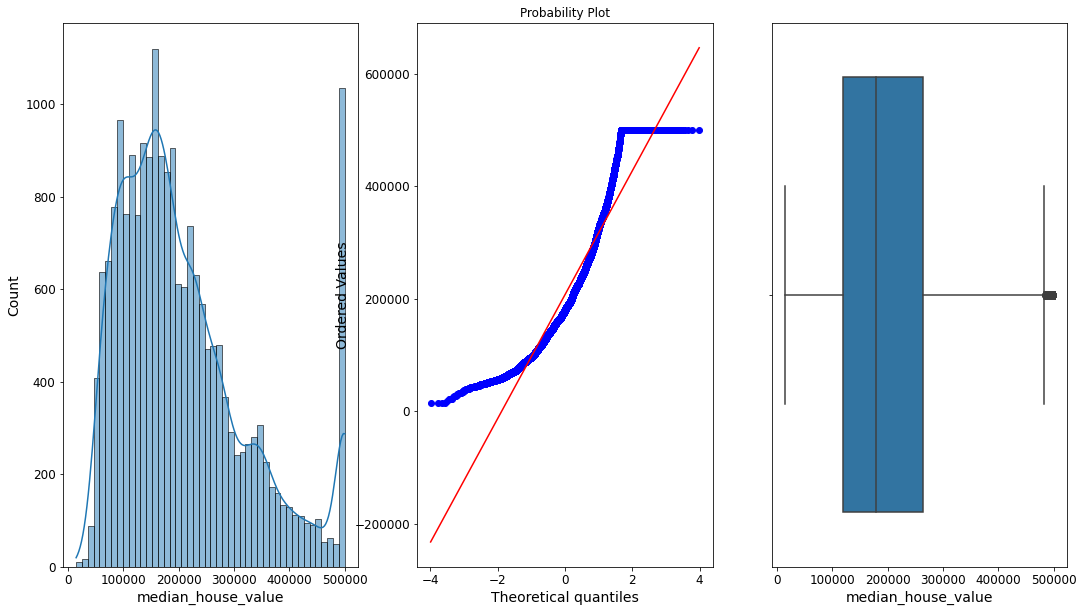

In [60]:
draw(housing,"median_house_value")

/home/md/anaconda3/envs/myproject/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


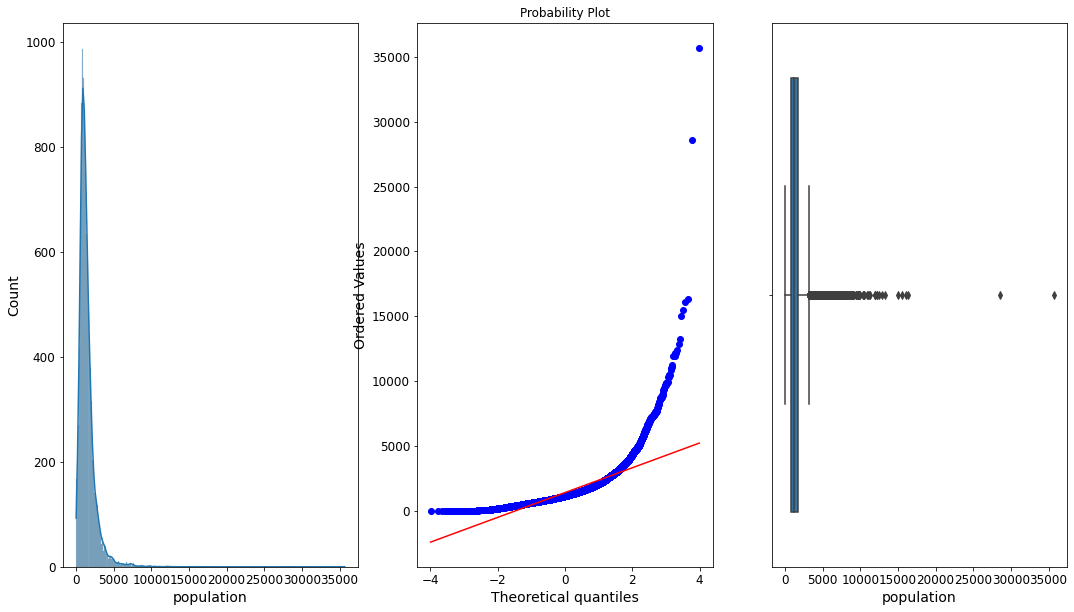

In [61]:
draw(housing, "population")

In [62]:
def outlier(df, var):
    IQR = df[var].quantile(0.75) - df[var].quantile(0.25)
    
    upper = df[var].quantile(0.75) + 3*IQR
    
    lower = df[var].quantile(0.25) - 3*IQR 
    
    return upper, lower


In [63]:
upper_pop , lower_pop = outlier(housing, "population")
outlier_pop = np.where(housing["population"] > upper_pop, True, np.where(housing["population"] < lower_pop, True, False) )

In [64]:
np.sum(outlier_pop)

421

In [65]:
housing2 = housing.loc[~(outlier_pop),:]

/home/md/anaconda3/envs/myproject/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


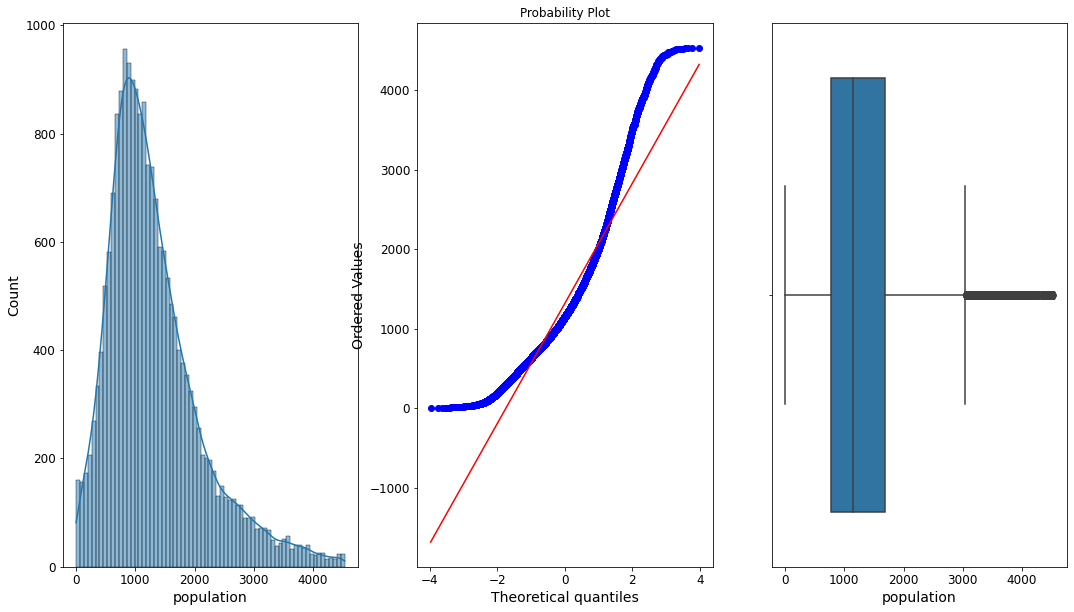

In [66]:
draw(housing2, "population")

In [67]:
housing2["population"].values.reshape([-1,1])

array([[ 322.],
       [2401.],
       [ 496.],
       ...,
       [1007.],
       [ 741.],
       [1387.]])

In [68]:
transform = PowerTransformer(method="box-cox")
transform.fit(housing2["population"].values.reshape([-1,1]))
housing2["population"] = pd.DataFrame(transform.transform(housing2["population"].values.reshape([-1,1])))

<ipython-input-68-e997ac08976c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing2["population"] = pd.DataFrame(transform.transform(housing2["population"].values.reshape([-1,1])))


/home/md/anaconda3/envs/myproject/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


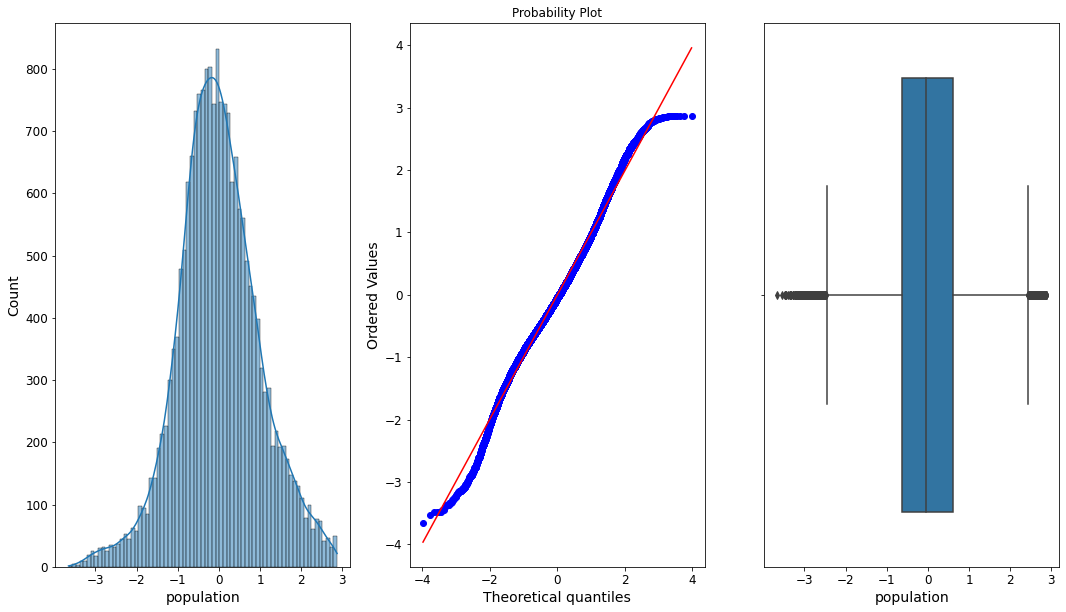

In [69]:
draw(housing2, "population")

In [70]:
housing2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,-1.637023,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,1.318626,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,-1.185717,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,-1.048476,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,-1.033566,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,NaN,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,NaN,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,NaN,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,NaN,349.0,1.8672,84700.0,INLAND


In [71]:
pre_cat = Pipeline(steps =[ 
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(drop="first",handle_unknown="ignore"))                       
                           ])
pre_num = Pipeline(steps = [ 
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())                      
                           ])
preprocessing = ColumnTransformer(transformers=[ 
    ("cat", pre_cat, cat),
    ("num", pre_num, num)                                                                                     ])

NameError: name 'SimpleImputer' is not defined

In [ ]:
X = housing2.drop(labels=["median_house_value"], axis=1)
y = housing2["median_house_value"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 0)

In [ ]:
preprocessing.fit(X_train)

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['ocean_proximity']),
                                ('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
           

In [ ]:
preprocessing.transform(X_train)

array([[ 0.        ,  0.        ,  0.        , ..., -1.28594107,
         4.07871946, -0.68784202],
       [ 0.        ,  0.        ,  0.        , ...,  0.3251166 ,
         0.08554767, -0.18092442],
       [ 0.        ,  0.        ,  0.        , ...,  0.01255098,
        -0.66906747,  0.17665317],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -1.00178923,
        -0.91361867, -0.26602202],
       [ 0.        ,  0.        ,  0.        , ...,  0.25043637,
         3.68394395, -0.43480242],
       [ 1.        ,  0.        ,  0.        , ..., -1.34269039,
        -0.5991957 , -0.52377762]])

In [ ]:
import warnings
import sklearn
import pandas as pd
def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [name + "__" + f for f in column]

        return [name + "__" + f for f in trans.get_feature_names()]
    
    ### Start of processing
    feature_names = []
    
    # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
    if type(column_transformer) == sklearn.pipeline.Pipeline:
        l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
    else:
        # For column transformers, follow the original method
        l_transformers = list(column_transformer._iter(fitted=True))
    
    
    for name, trans, column, _ in l_transformers: 
        if type(trans) == sklearn.pipeline.Pipeline:
            # Recursive call on pipeline
            _names = get_feature_names(trans)
            # if pipeline has no transformer that returns names
            if len(_names)==0:
                _names = [name + "__" + f for f in column]
            feature_names.extend(_names)
        else:
            feature_names.extend(get_names(trans))
    
    return feature_names

In [ ]:
name = get_feature_names(preprocessing)

<ipython-input-121-137dfb1fdb32>:33: UserWarning: Transformer imputer (type SimpleImputer) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "
/home/md/anaconda3/envs/myproject/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
<ipython-input-121-137dfb1fdb32>:33: UserWarning: Transformer scaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "


In [ ]:
name

['onehot__x0_INLAND',
 'onehot__x0_ISLAND',
 'onehot__x0_NEAR BAY',
 'onehot__x0_NEAR OCEAN',
 'num__longitude',
 'num__latitude',
 'num__housing_median_age',
 'num__total_rooms',
 'num__total_bedrooms',
 'num__population',
 'num__households',
 'num__median_income']

In [ ]:
X_train2 = pd.DataFrame(preprocessing.transform(X_train), columns = name)

In [ ]:
X_train2

,onehot__x0_INLAND,onehot__x0_ISLAND,onehot__x0_NEAR BAY,onehot__x0_NEAR OCEAN,num__longitude,num__latitude,num__housing_median_age,num__total_rooms,num__total_bedrooms,num__population,num__households,num__median_income
0,0.0,0.0,0.0,1.0,1.217901,-1.355310,-1.035990,2.295621,4.122057,-1.285941,4.078719,-0.687842
1,0.0,0.0,0.0,0.0,1.392580,-1.416025,-0.795231,0.129955,0.057738,0.325117,0.085548,-0.180924
2,0.0,0.0,0.0,0.0,0.768727,-0.794864,0.649322,-0.707714,-0.716866,0.012551,-0.669067,0.176653
3,0.0,0.0,0.0,0.0,0.359479,-0.664093,-0.233461,-0.325575,-0.694914,-0.047093,-0.620157,0.637983
4,0.0,0.0,0.0,0.0,0.599039,-0.752830,0.569069,-0.218652,0.211404,-0.008107,0.211317,-0.489194
...,...,...,...,...,...,...,...,...,...,...,...,...
16170,1.0,0.0,0.0,0.0,1.038232,-0.748160,-1.918773,0.956236,0.512465,-1.352741,0.696926,0.679484
16171,1.0,0.0,0.0,0.0,0.079993,0.153225,-0.634725,-1.197409,-1.193546,-0.791955,-1.203587,-0.794581
16172,1.0,0.0,0.0,0.0,-0.823346,1.694452,-1.437255,-0.747573,-0.870533,-1.001789,-0.913619,-0.266022
16173,0.0,0.0,0.0,0.0,0.873534,-0.888271,-0.474219,2.320296,3.516800,0.250436,3.683944,-0.434802


In [ ]:
X_test2 = pd.DataFrame(preprocessing.transform(X_test), columns= name)

In [ ]:
X_test2

,onehot__x0_INLAND,onehot__x0_ISLAND,onehot__x0_NEAR BAY,onehot__x0_NEAR OCEAN,num__longitude,num__latitude,num__housing_median_age,num__total_rooms,num__total_bedrooms,num__population,num__households,num__median_income
0,0.0,0.0,0.0,1.0,0.713828,-0.874260,-0.153208,0.377333,0.895063,1.551589,0.979906,-0.165152
1,0.0,0.0,0.0,0.0,0.544140,-0.738819,1.050587,0.262185,-0.444030,0.983435,-0.546792,5.833233
2,1.0,0.0,0.0,0.0,0.958378,-0.019580,-1.196496,-0.447050,-0.346813,-0.836190,-0.522337,-0.674270
3,1.0,0.0,0.0,0.0,-0.893217,1.409558,-0.955737,1.530710,1.738660,-1.464498,1.968592,-0.739142
4,0.0,0.0,0.0,0.0,-0.444043,-0.281121,0.007298,-0.715939,-0.698050,-0.280055,-0.759901,-0.487569
...,...,...,...,...,...,...,...,...,...,...,...,...
4039,0.0,0.0,0.0,0.0,0.908470,-1.009701,0.729575,0.876518,0.964056,2.774540,0.592118,0.595486
4040,0.0,0.0,0.0,0.0,0.713828,-0.715467,1.853117,-0.915234,-0.970886,-0.217961,-1.077817,0.225385
4041,0.0,0.0,0.0,0.0,0.609021,-0.799534,1.211093,-1.218921,-1.209226,0.433710,-1.259484,-0.447902
4042,0.0,0.0,0.0,0.0,0.584067,-0.822886,0.408563,-1.206267,-1.237451,-0.099492,-1.266471,1.295498


In [ ]:
para = {"alpha" : [0.1,1,10,100,1000]}
clf = GridSearchCV(Lasso(), para, scoring="neg_mean_squared_error")
clf.fit(X_train2, y_train)


GridSearchCV(estimator=Lasso(), param_grid={'alpha': [0.1, 1, 10, 100, 1000]},
             scoring='neg_mean_squared_error')

In [ ]:
clf.best_estimator_

Lasso(alpha=1)

In [ ]:
sel = SelectFromModel(Lasso(alpha=clf.best_params_["alpha"]))
sel.fit(X_train2,y_train)

SelectFromModel(estimator=Lasso(alpha=1))

In [ ]:
sel.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [ ]:
para = {"alpha" : [0.1,1,10,100]}
clf = GridSearchCV(Ridge(), para, scoring="neg_mean_squared_error")
clf.fit(X_train2, y_train)

GridSearchCV(estimator=Ridge(), param_grid={'alpha': [0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
clf.best_estimator_

Ridge(alpha=0.1)

In [ ]:
Ri = Ridge(alpha=0.1)
Ri.fit(X_train2, y_train)

Ridge(alpha=0.1)

In [ ]:
reg = LinearRegression()
reg.fit(X_train2, y_train)

LinearRegression()

In [ ]:
y_pred = reg.predict(X_test2)

In [ ]:
y_pred

array([242760.50668742, 683147.16936007,  62420.06383203, ...,
       195532.89601607, 322414.5465932 , 172343.60519549])

In [ ]:
y_pred = Ri.predict(X_test2)

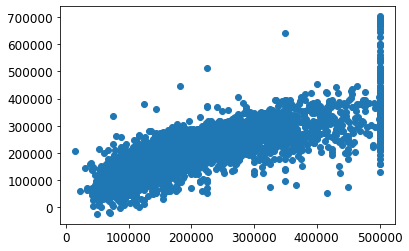

In [ ]:
plt.scatter(y_test,y_pred)

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred, squared=False)

In [ ]:
rmse

68696.12062328483

In [ ]:
y_pred

array([216662.07176676, 287583.79047825, 179529.23088995, ...,
        89224.30086976, 255329.55422543, 213358.55802712])

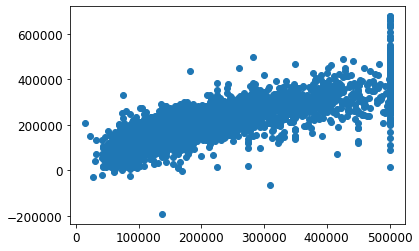

In [ ]:
plt.scatter(y_test,y_pred)